<a href="https://colab.research.google.com/github/matijabeljak/Machine-Learning/blob/main/cancerdataset_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import statistics

Data preparation

In [54]:
data = pd.read_csv("cancer2.csv")
data.head()

,"diagnosis(1=m, 0=b)",radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


diagnosis(1=m, 0=b)       0.077972
radius_mean              -0.042641
texture_mean              0.054458
perimeter_mean           -0.005523
area_mean                -0.019887
smoothness_mean           0.283607
compactness_mean          0.507318
concavity_mean            0.449301
concave points_mean       0.257584
symmetry_mean             0.331786
fractal_dimension_mean    0.688132
radius_se                 0.227754
texture_se                0.279723
perimeter_se              0.244143
area_se                   0.127071
smoothness_se             0.427374
compactness_se            0.803269
concavity_se              0.727372
concave points_se         0.611044
symmetry_se               0.369078
fractal_dimension_se      1.000000
Name: fractal_dimension_se, dtype: float64


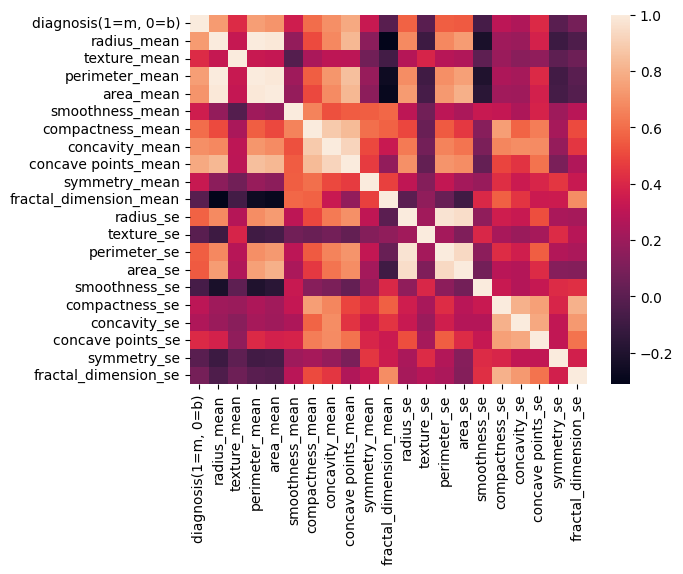

In [55]:

cor=data.corr().iloc[-1]
sns.heatmap(data.corr())
print(cor)

<Axes: xlabel='fractal_dimension_se', ylabel='compactness_se'>

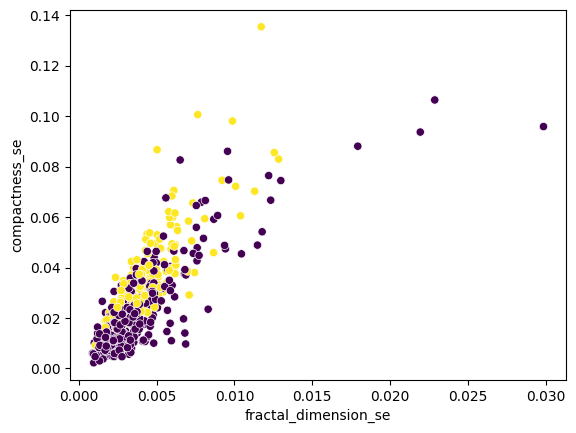

In [56]:
sns.scatterplot(data, x=data['fractal_dimension_se'], y=data['compactness_se'], c=data['diagnosis(1=m, 0=b)'])

In [57]:
X=data['fractal_dimension_se']
y=data['compactness_se']
cl=data['diagnosis(1=m, 0=b)']
Pos=list(zip(X,y))
Pos_train, Pos_test, cl_train, cl_test = train_test_split(Pos, cl ,random_state=104, test_size=0.2, shuffle=True)

In [58]:
knn = KNeighborsClassifier(3)

knn.fit(Pos_train, cl_train)

KNeighborsClassifier(n_neighbors=3)

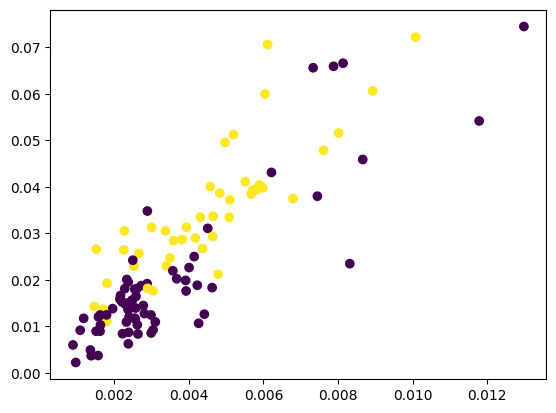

In [59]:
i=0
rng = len(Pos_test)
X_test=[]
y_test=[]
test_res=[]
while i < rng:
  new_point = [Pos_test[i]]
  X_test.append(Pos_test[i][0])
  y_test.append(Pos_test[i][1])
  prediction = knn.predict(new_point)
  test_res.append(prediction)
  i=i+1

plt.scatter(x=X_test, y=y_test, c=test_res)




In [60]:
FalsePos=0
FalseNeg=0
TruePos=0
TrueNeg=0
i=0
while i<rng:
  if cl_test.values[i]==test_res[i][0] and cl_test.values[i]==0:
    TrueNeg=TrueNeg+1
  if cl_test.values[i]==test_res[i][0] and cl_test.values[i]==1:
    TruePos=TruePos+1
  if cl_test.values[i]!=test_res[i][0] and cl_test.values[i]==0:
    FalsePos=FalsePos+1
  if cl_test.values[i]!=test_res[i][0] and cl_test.values[i]==1:
    FalseNeg=FalseNeg+1
  i=i+1
print(FalsePos,FalseNeg,TruePos,TrueNeg)

21 23 22 48
